# CS535/EE514 Machine Learning - Spring 2024 - Assignment 2

# Regularized Regression using Gradient Descent

**Date Assigned**: Friday, February 9, 2024

**Date Due**: Monday, February 19, 2024 (5:00 pm)

**Important Notes**

1.   The assignment integrates tasks spanning methods as well as principles. Some tasks will involve implementation (in Python) and some may require mathematical analysis.  
2.   All cells must be run once before submission and should be displaying the results(graphs/plots etc). Failure to do so will result in deduction of points.
3.   While discussions with your peers is strongly encouraged, please keep in mind that the assignment is to be attempted on an individual level. Any plagiarism (from your peers) will be referred to the DC without hestitation.
4. For tasks requiring mathematical analysis, students familiar with latex may type their solutions directly in the appropriate cells of this notebook. Alternatively, they may submit a hand-written solution as well.
5. Use procedural programming style and comment your code properly.
5. Upload your solutions as a zip folder with name `RollNumber_A2` on the Assignment tab and submit your hand-written solutions in the drop-box next to the instructor's office.
5. **Policy on Usage of Generative AI Tools**. Students are most welcome to use generative AI tools as partners in their learning journey. However, it should be kept in mind that these tools cannot be blindly trusted for the tasks in this assignment (hopefully) and therefore it is important for students to rely on their own real intelligence (pun intended) before finalizing their solution/code. It is also mandatory for students to write a statement on how exactly have they used any AI tool in completing this assignment.
5. **Vivas** The teaching staff reserves the right to conduct a viva for any student.   
5. **Policy on Late Submission**. Late solutions will be accepted with a 15% penalty per day till Wednesday, February 21 2024 (5:00 pm) . No submissions will be accepted after that.      




The following packages are required for this assignment. If you are running notebook on your PC, open a terminal/command prompt window in the assignment folder and run the following command:

`pip install -r requirements.txt`

If you are working on Google Colab, you do not need this. In case the `root_mean_squared` function throws an import error, just use the mean squared error with the argument `squared` set to `False`.

In [1]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # set 'squared' argument to false to get RMSE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Recap
### Keywords: Linear Regression, Gradient Descent, Regularization, Sparsity

So far in this course we have dealt with the following optimization problem:

Given $N$ input/target pairs $\{\mathbf{x}_i, y_i \}_{i=1}^N$ with $\mathbf{x}_i \in \mathbb{R}^{M}$ and $\mathbf{y} \in \mathbb{R}$, find a vector $\mathbf{w} \in \mathbb{R}^{M+1}$ such that the following loss (mean square error) is minimized:

\begin{equation*}
\mathcal{L} = \frac{1}{N}\left(\mathbf{y} - X\mathbf{w}\right)^T\left(\mathbf{y} - X\mathbf{w}\right) = \frac{1}{N} ||\mathbf{y} - X\mathbf{w}||_2^2
\end{equation*}

where $X =
\begin{bmatrix}
  1 & x_{1,1} & \cdots & x_{1,M}  \\
  \vdots & \ddots & \vdots \\
  1 & x_{N,1} & \cdots & x_{N,M} \\
\end{bmatrix}
$

We found that optimal solution to this problem is:
\begin{equation*}
\hat{\mathbf{w}} = (X^{T}X)^{-1}X^{T}\mathbf{y}
\end{equation*}

### Gradient Descent

Many, in fact most, optimization problems, however, do not have such clear analyical solutions. Even in cases where they do, such as the least squares problem given above, the solution entails costly operations like computing inverses.

Luckily, for differentiable and [convex](https://www.princeton.edu/~aaa/Public/Teaching/ORF523/S16/ORF523_S16_Lec7_gh.pdf) optimization problems we can utilize a technique known as gradient descent to arrive at an optimal solution.


Consider a loss surface of 2 variables: $f(x, y) = x^{2} + y^{2}$


<img src="Figures\quadratic_surface2d.png" width="600"/>


Imagine standing at one point on this surface, to get to the bottom, one must start descending. The fastest way to get to the bottom is to start moving in the direction of steepest descent.

Recall from calculus the directional derivative: For a surface $f: \mathbb{R}^{n} \to \mathbb{R}$, the directional derivative measures the rate of change along any direction $\mathbf{u} \in \mathbb{R}^{n}$ where $||\mathbf{u}||_{2} = 1$ from a point $f(\mathbf{x})$ on the surface and is defined as:
\begin{equation*}
D_{u}f(\mathbf{x}) = \nabla{f(\mathbf{x})} \cdot {\mathbf{u}}
\end{equation*}



By moving $\mathbf{x}$ along a direction $\mathbf{u}$ which gives the least (i.e. most negative) value of the directional derivate, one reaches an $\mathbf{x}^{*}$ that minimizes $f$

#### **Task 1**
 Show that the directional derivate is minimized (most negative) when $\mathbf{u} = -\nabla{f(\mathbb{x})}$

Hint: Use the geometric interpretation of the dot product.

_Double click on this box and write your answer in LaTeX._

Now that we know that the direction of steepest descent is given by $-\nabla{f(\mathbf{x})}$, how do we actually descend to this minimum point algorithmically?

The gradient descent algorithm is as follows:

_While not converged:_

$\mathbf{x} \leftarrow \mathbf{x} - \alpha \nabla{f(\mathbb{x})}$

where $\alpha$ is the learning rate. Bear in mind that each assignment actually consists of $n$ assignments. One for each $x_{i}$


The convergence criteria can be decided in multiple ways. One option is to stop when $||\nabla{f(\mathbf{x})}|| < \epsilon$ where $\epsilon$ is some predefined small, positive constant. Alternatively, and usually, we specify a fixed number of iterations.

#### **Task 2**

Let $f(x, y) = (x-3)^{2} + (y+1)^{2}$

**2.1**


What is the gradient of this function?

Answer (replace the question marks):

\begin{equation*}
\nabla{((x-3)^{2} + (y+1)^{2})} = \begin{bmatrix}
    \frac{\partial f}{\partial x}\vphantom{\frac{\partial f}{\partial y}} \\
    \frac{\partial f}{\partial y}\vphantom{\frac{\partial f}{\partial y}} \\
    \end{bmatrix} =
    \begin{bmatrix}
    ? \\
    ? \\
    \end{bmatrix}
\end{equation*}

**2.2**
Complete the following function that uses gradient descent to find $x$ and $y$ that minimize the function above. Please also use the `verbose` argument to print $x$ and $y$ every few iterations. Are your final answers as expected?

In [2]:
def gradient_descent_quadratic(x0, y0, learning_rate, num_iterations, verbose=True):
    """
    Find the minimum point of the function f(x, y) = (x-3)^2 + (y+1)^2

    Args:
        x0 (float)           : Starting x value
        y0 (float)           : Starting y value
        learning_rate (float): Learning rate for each gradient descent step
        num_iterations (int) : Number of iterations to perform before returning
        verbose (bool)       : Print x_, y_ after every few steps if True

    Returns:
        x_ (float)           : x value of point that minimizes f
        y_ (float)           : y value of point that minimizes f
    """
    # computing gradients of x and y
    def grad_x(x):
        return 2 * (x - 3)
    def grad_y(y):
        return 2 * (y + 1)
    
    # implementing gradient descent algorithm
    x_ = x0
    y_ = y0 
    for i in range(num_iterations):
        x_ = x_ - (learning_rate * grad_x(x_))
        y_ = y_ - (learning_rate * grad_y(y_))
    
    return x_, y_

In [3]:
x_quad_opt, y_quad_opt = gradient_descent_quadratic(x0=6, y0=2, learning_rate=0.001, num_iterations=10000, verbose=True)
print(f"x_ = {x_quad_opt:3f}, y_ = {y_quad_opt:.3f}")

x_ = 3.000000, y_ = -1.000


### Regularization

While training regression models, it is useful to ensure that there are some constraints on the weights learnt. These constraints are usually defined by some kind of penalty function included in the overall loss function and the exact utility depends on the kind of norm. Generally, penalizing the norm of our weights means that during the training process, our model will prefer smaller values of weights.

We shall look at two types of regularization techniques. The first is Ridge Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}||y - X\mathbf{w}||_{2}^{2} + \lambda ||\mathbf{w}||_{2}^{2}
\end{equation*}

The second is Lasso Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}||y - X\mathbf{w}||_{2}^{2} + \lambda ||\mathbf{w}||_{1}^{2}
\end{equation*}

The L2 penalty on the weights penalizes larger values more than smaller ones while the L1 penalty penalizes all kinds of weights equally. The L1 penalty is also used to promote sparsity in the learnt weights (i.e. make certain weights which do not have a strong correlation with the data 0).

Please also note, for regularization to function properly, input data must be normalized to have zero mean and unit variance. This has already been done for you and data has been provided as the variables `x_train_norm`, `x_val_norm`, `x_train_dense_norm`, and `x_val_dense_norm`. To use your model for predictions and training, normalize your data using this function and then pass it through the model.

You shall now use gradient descent to fit parameters to two versions of synthetic data that differ in the amounts of data points available. To do so, you must complete the `LinearRegression` class provided. This class should work for both Linear Regression and Ridge Regression. Furthermore, it should be able to compute solutions analytically as well as via gradient descent. A function to generate the feature matrix for a specified polynomial degree has been provided.

#### **Task 3**

Perform the following regression tasks using a polynomial of degree 5 on both the sparse and dense synthetic datasets with 100 values of `lambd` varying linearly from 0 to 25:

1. Plot the curves showing training and validation RMSE for each value of `lambd` (one graph for the sparse data, one for the dense).

2. Compute $||\mathbf{w} - \hat{\mathbf{w}}||_{2}$ as a function of $\lambda$ for both, the sparse data and dense data. Plot them on the same graph. (`w` has been defined in the code below). $\hat{\mathbf{w}}$ are the coefficients learnt by the model.

3. Plot the output of the model with the least validation RMSE overlaid on top of the original data for both the sparse and dense data.

4. What do you notice about the effect of varying $\lambda$ on both the sparse and dense dataset (the effect on the training/validation losses as well as the estimation error $||\mathbf{w} - \hat{\mathbf{w}}||_{2}$)?

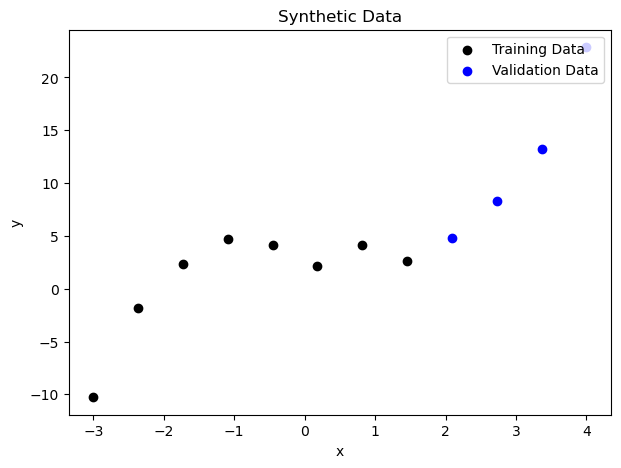

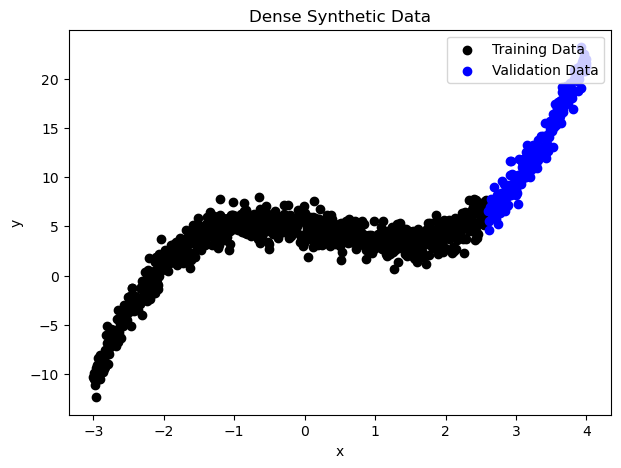

In [4]:
# Part 1

# Sparse synthetic data
x = np.linspace(-3, 4, 12)
X = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5]).T
w = np.array([5.0, -1.2, -0.6, 0.5, 0., 0.]).reshape((-1, 1))
seed = np.random.seed(45)
noise = np.random.randn(len(x)).reshape((-1, 1))
y = X @ w + noise

# y = 5 + 0.5*x**3 - 0.6**x**2 - 1.2*x + 2*np.random.randn(len(x))

x_train = x[:8].reshape((-1, 1))
y_train = y[:8].reshape((-1, 1))

x_val = x[8:].reshape((-1, 1))
y_val = y[8:].reshape((-1, 1))

sparse_scaler = StandardScaler()
x_train_norm = sparse_scaler.fit_transform(x_train)
x_val_norm = sparse_scaler.transform(x_val)

# Dense synthetic data
x = np.linspace(-3, 4, 1000)
X = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5]).T
seed = np.random.seed(45)
noise = np.random.randn(len(x)).reshape((-1, 1))
y = X @ w + noise

x_train_dense = x[:800].reshape((-1, 1))
y_train_dense = y[:800].reshape((-1, 1))

x_val_dense = x[800:].reshape((-1, 1))
y_val_dense = y[800:].reshape((-1, 1))

dense_scaler = StandardScaler()
x_train_dense_norm = dense_scaler.fit_transform(x_train_dense)
x_val_dense_norm = dense_scaler.transform(x_val_dense)

fig = plt.figure(figsize=(7, 5))
ax = fig.subplots()
_ = ax.scatter(x_train, y_train, color="black", label="Training Data")
_ = ax.scatter(x_val, y_val, color="blue", label="Validation Data")
_ = ax.set_title("Synthetic Data")
_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.legend(loc="upper right")


fig = plt.figure(figsize=(7, 5))
ax = fig.subplots()
_ = ax.scatter(x_train_dense, y_train_dense, color="black", label="Training Data")
_ = ax.scatter(x_val_dense, y_val_dense, color="blue", label="Validation Data")
_ = ax.set_title("Dense Synthetic Data")
_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.legend(loc="upper right")

In [5]:
#TO DO
class _LinearRegression:
    """
    A class to perform linear regression

    Methods:
        __init__(self, lambd, degree)                                                  : Initializes the LinearRegression instance.
        _normalize_input(self, x)                                                      :
        _generate_X(self, x)                                                           : Generate the matrix X containing samples of data upto the degree specified.
                                                                                         Bias term is included (i.e. first column is all ones).
        analytical_solution(self, x, y)                                                : Find the analytical solution for model weights which 
                                                                                        minimizes mean square error
        gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4) : Find a gradient descent based solution for model weights which minimizes mean square error.
    """
    def __init__(self, lambd, degree):

        self.lambd = lambd
        self.degree = degree

    def _normalize_input(self, x):
        """
        Normalize input data, must be done before converting into feature matrix

        Args:
            x (numpy.ndarray)            : Input data of shape (num_points, 1)

        Returns:
            x_normalized (numpy.ndarray) : Normalized version of x with zero mean and unit variance
        """
        return (x - np.mean(x))/np.std(x)

    def _generate_X(self, x):
        """
        Generate the matrix X containing samples of data upto the degree specified.
        Bias term is included (i.e. first column is all ones).

        Args:
            x (numpy.ndarray) : Input data of shape (num_points, 1)

        Returns:
            X (numpy.ndarray) : Matrix of shape (num_points, degree+1)
        """
        polynomial_features = PolynomialFeatures(degree=self.degree)
        X = polynomial_features.fit_transform(x)
        return X

    def analytical_solution(self, x, y):
        """
        Find the analytical solution for model weights which minimizes mean square error

        Args:
            x (numpy.ndarray) : x values of data
            y (numpy.ndarray) : y values of data

        Returns:
            w                 : list of optimal weights for regression
        """
        # Generating polynomial Matrix        
        X_matrix = self._generate_X(x)

        # Calculating components
        xTx = X_matrix.T @ X_matrix
        identity_matrix = np.identity(X_matrix.shape[1])
        xTx_lambda_inv = np.linalg.inv(xTx + (self.lambd * identity_matrix))
        xTy = X_matrix.T @ y
        w = xTx_lambda_inv @ xTy

        # print(np.shape(w))
        
        return w

    def gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4):
        """
        Find a gradient descent based solution for model weights which minimizes mean square error.

        Args:
            x (numpy.ndarray)    : x values of data
            y (numpy.ndarray)    : y values of data
            learning_rate (float): Learning rate for each gradient descent step
            num_iterations (int) : Number of iterations to perform before returning
            tol (float)          : value of epsilon s.t. when ||grad(f(x))||_{2} < epsilon, the algorithm terminates

        Returns:
        w               : list of optimal weights for regression
        """
        ## YOUR CODE HERE ##
        X_matrix = self._generate_X(x)
        num_features = X_matrix.shape[1]
        w = np.zeros(num_features)

        for i in range(num_iterations):
            y_pred = np.dot(X_matrix, w)

            grad = -2 * np.dot(X_matrix.T, (y - y_pred))

            w -= learning_rate * grad

            norm_grad = np.linalg.norm(grad)
            if norm_grad  < tol:
                return
        
        return w

201.61261512285293
39.308145267226514
16.712121279005427
6.013964657307251
4.300148817768331
9.59911219821649
14.60705075164698
19.024934359326625
22.947564213035257
26.462803598477308
29.63783934464603
32.524145121080714
35.162049491421534
37.583860672877954
39.81595723893488
41.88021683204947
43.795021284252
45.575984034443394
47.23649004914333
48.788105461321784
50.24089427889931
51.6036672457863
52.884180146356975
54.08929375855063
55.225104255369104
56.29705051998865
57.3100032047434
58.26833919691665
59.176004306264666
60.03656636340096
60.853260449842516
61.629027625519974
62.36654824733849
63.068270761460326
63.73643668696592
64.37310237833286
64.98015805057835
65.55934446788454
66.11226762953345
66.64041173257165
67.14515064618075
67.62775809622944
68.08941672833643
68.53122619277413
68.95421037369614
69.35932386773236
69.74745780232954
70.11944507184865
70.47606505895628
70.81804789994428
71.14607834502883
71.46079925818633
71.76281479552004
72.05269329636126
72.3309699171771

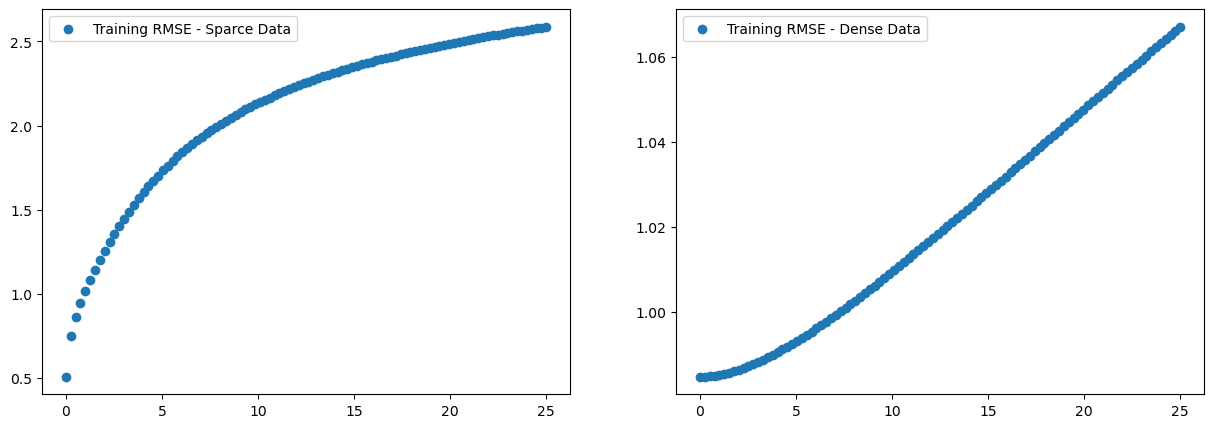

In [6]:
# Perform evaluations
lambdas = np.linspace(0, 25, 100)
lin_reg = _LinearRegression(lambd=0, degree=5)

# RMSE list
rmse_train_sparce = []
rmse_val_sparce = []

rmse_train_dence = []
rmse_val_dence = []

# Norm Difference List
norm_dif_sparse_list = []
norm_dif_dense_list = []

# Least RMSE
least_val_rmse_sparse = float("inf")
least_val_rmse_dense = float("inf")

least_val_rmse_w_hat_sparse = None
least_val_rmse_w_hat_dense = None

for lambdah in lambdas:
    # set lambda
    lin_reg.lambd = lambdah

    # Sparse Data
    x_train_sparce = x_train_norm
    x_val_sparce = x_val_norm

    # Dense Data
    x_train_dense = x_train_dense_norm
    x_val_dense = x_val_dense_norm

    # sparce feature matrix
    X_train_sparce = lin_reg._generate_X(x_train_sparce)  
    X_test_sparce = lin_reg._generate_X(x_val_sparce)

    X_train_dense = lin_reg._generate_X(x_train_dense)
    X_test_dense = lin_reg._generate_X(x_val_dense)

    # true train and validation outputs
    y_train_sparce = y_train
    y_val_sparce = y_val

    # Predicted values - Sparce
    w_hat_sparse = lin_reg.analytical_solution(x_train_sparce, y_train_sparce)
    y_pred_train_sparce =  X_train_sparce @ w_hat_sparse
    y_pred_val_sparce = X_test_sparce @ w_hat_sparse

    # Predicted values - Dense
    w_hat_dense = lin_reg.analytical_solution(x_train_dense, y_train_dense)
    y_pred_train_dense =  X_train_dense @ w_hat_dense
    y_pred_val_dense = X_test_dense @ w_hat_dense

    # Calculating RMSE Values - Sparse
    rmse_t_s = mean_squared_error(y_train_sparce, y_pred_train_sparce, squared=False) 
    rmse_v_s = mean_squared_error(y_val_sparce, y_pred_val_sparce, squared=False)
    rmse_train_sparce.append(rmse_t_s)
    rmse_val_sparce.append(rmse_v_s)

    # Calculating RMSE Values - Dense
    rmse_t_d = mean_squared_error(y_train_dense, y_pred_train_dense, squared=False) 
    rmse_v_d = mean_squared_error(y_val_dense, y_pred_val_dense, squared=False)
    rmse_train_dence.append(rmse_t_d)
    rmse_val_dence.append(rmse_v_d)

    # Calculating norm weight difference - Sparse
    norm_diff_sparse = np.linalg.norm(w - w_hat_sparse)
    norm_dif_sparse_list.append(norm_diff_sparse)

    # Calculating norm weight difference - Dense
    norm_diff_dense = np.linalg.norm(w - w_hat_dense)
    norm_dif_dense_list.append(norm_diff_dense)
    
    print(rmse_v_s)
    if rmse_v_s < least_val_rmse_sparse:
        least_val_rmse_sparse = rmse_v_s
        least_val_rmse_w_hat_sparse = w_hat_sparse

    if rmse_v_d < least_val_rmse_dense:
        least_val_rmse_dense = rmse_v_d
        least_val_rmse_w_hat_dense = w_hat_dense
    
# Plotting RMSE Values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
axes[0].scatter(lambdas, rmse_train_sparce, label="Training RMSE - Sparce Data")
axes[0].legend()

axes[1].scatter(lambdas, rmse_train_dence, label="Training RMSE - Dense Data")
axes[1].legend()
plt.show()

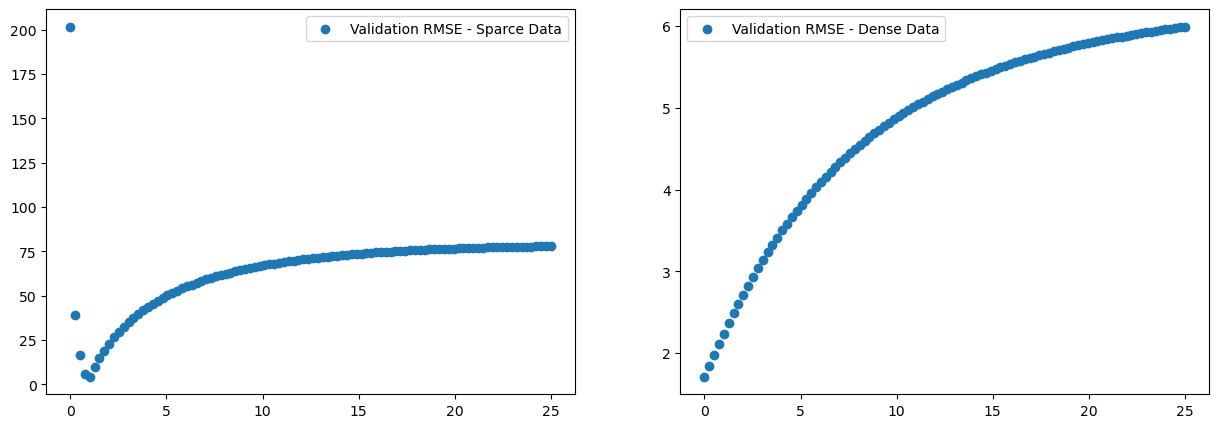

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
axes[0].scatter(lambdas, rmse_val_sparce, label="Validation RMSE - Sparce Data")
axes[0].legend()

axes[1].scatter(lambdas, rmse_val_dence, label="Validation RMSE - Dense Data")
axes[1].legend()
plt.show()

Text(0, 0.5, '|| w - w_hat ||_2')

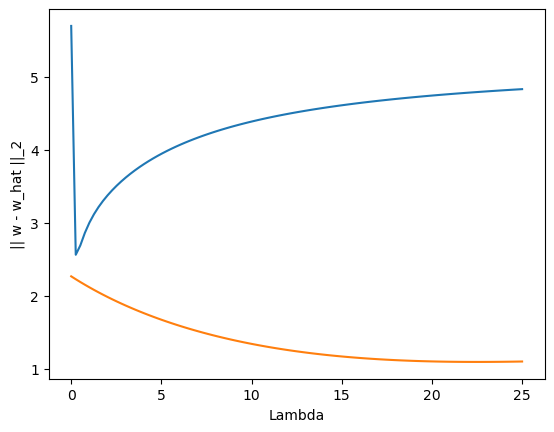

In [8]:
# Part 2
plt.plot(lambdas, norm_dif_sparse_list, label="Sparse Data")
plt.plot(lambdas, norm_dif_dense_list, label="Dense Data")

plt.xlabel("Lambda")
plt.ylabel("|| w - w_hat ||_2")

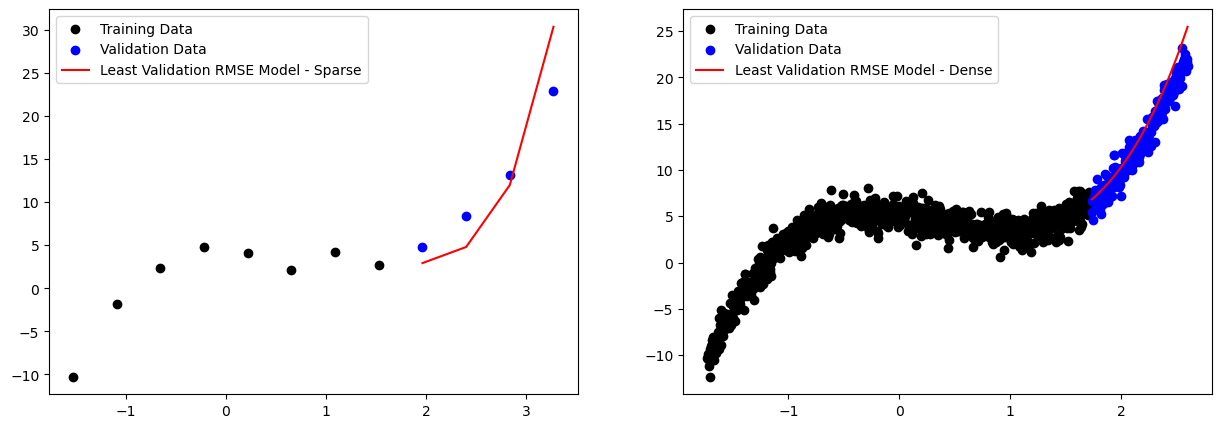

In [9]:
# Part 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
axes[0].scatter(x_train_sparce, y_train_sparce, color="black", label="Training Data")
axes[0].scatter(x_val_sparce, y_val_sparce, color="blue", label="Validation Data")

model_sparse = X_test_sparce @ least_val_rmse_w_hat_sparse
axes[0].plot(x_val_sparce, model_sparse, color="red", label="Least Validation RMSE Model - Sparse")
axes[0].legend()

axes[1].scatter(x_train_dense, y_train_dense, color="black", label="Training Data")
axes[1].scatter(x_val_dense, y_val_dense, color="blue", label="Validation Data")

model_dense = X_test_dense @ least_val_rmse_w_hat_dense
axes[1].plot(x_val_dense, model_dense, color="red", label="Least Validation RMSE Model - Dense")
axes[1].legend()

plt.show()

Part 4 -
Your comments:

Training and Validation Losses:

the higher the lamda, the more generalized the model becomes. Overfitting is minimized but it leads to a higher loss due to being a worse fit.

In Training data, a higher lambda results in a worse fit becuase the model is generalized.
In Validation data, a higher lambda prevents overfitting, leading to a beteer generalization performance of the model.

Estimation Error:

in estimation error, as lambda increases, the penalty for larger weights is more significant. High lamda values in regularization tend to decrease the weights towards zero.

#### **Task 4**

Now use the scikit-learn library to perform Linear, Ridge, and Lasso regression to learn the relationship between $y$: fuel average / mpg of different cars and $\mathbf{x}$: other associated features in the `auto_mpg` dataset. You may create your own version of the `generate_X` function from the class implemented above to experiment with models that are non-linear _in features_. Also, do not forget to normalize your input data. A good way to implement all of these in one go is to make a scikit-learn [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

Print the coefficients learnt by each model. Is there anything particular about the coefficients learnt by Lasso regression?

Do not forget to report both training and validation RMSE.

In [10]:
# Load and display data
auto_mpg_data = pd.read_csv("auto_mpg_dataset.csv")
auto_mpg_data = auto_mpg_data.drop(["car name", "origin"], axis=1)
auto_mpg_data = auto_mpg_data.apply(pd.to_numeric, errors="coerce")
auto_mpg_data = auto_mpg_data.dropna()
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [11]:
# Extract target feature
Y = auto_mpg_data["mpg"]

# Extract independent numerical features
X = np.array(auto_mpg_data[
    ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]
])


# Train test split
train_ratio = 0.8
train_length = int(train_ratio*len(Y))
x_train, y_train = X[:train_length, :], Y[:train_length]
x_val, y_val = X[train_length:, :], Y[train_length:]

# Normalize features
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.transform(x_val)

In [12]:
## YOUR CODE HERE ##
def generate_X(x, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(x)
    return X



def model_evaluation(type, x_train, y_train, x_val, y_val):

    # Generating matrices
    X_train = generate_X(x_train, 1)
    X_val = generate_X(x_val, 1)


    if type == "linear":
        model = LinearRegression()

    elif type == "ridge":
        model = Ridge(alpha=0.5)

    elif type == "lasso":
        model = Lasso(alpha=0.5)

    model.fit(X_train, y_train)

    # Training Predictions
    y_pred_train = model.predict(X_train)

    # Validation Predictions
    y_pred_value = model.predict(X_val)

    # Coefficients of the model
    coefficients = model.coef_

    print(f"{type.capitalize()} Regression: ")
    print("Coefficients:", coefficients)
    print()

model_evaluation("linear", x_train_norm, y_train, x_val_norm, y_val)
model_evaluation("ridge", x_train_norm, y_train, x_val_norm, y_val)
model_evaluation("lasso", x_train_norm, y_train, x_val_norm, y_val)

Linear Regression: 
Coefficients: [ 0.         -0.85036952  0.41062759 -0.3355686  -5.00812823 -0.29627033
  1.66870316]

Ridge Regression: 
Coefficients: [ 0.         -0.84044601  0.33468249 -0.36163267 -4.92497539 -0.31331695
  1.65990807]

Lasso Regression: 
Coefficients: [ 0.         -0.33581102 -0.         -0.         -4.81425012  0.
  1.22282707]



lasso regression tends to shrink less important features towards zero, hence why most of the coefficients are zero.

In general, it is a hard task to find the optimal value of the regularization parameter, or any hyperparameter, and this task often requires experimentation. One technique to to find such parameters is cross-fold validation. A guide is available in the scikit-learn [documentation](https://scikit-learn.org/stable/modules/grid_search.html).

#### **Task 5**

Use the `GridSearchCV` class to find an optimal value of the regularization parameter for either both the Lasso and Ridge regression models. Are the values same in both cases?

In [ ]:
## YOUR CODE HERE ##

grid = {"alpha" : [0.01, 0.1, 0.5, 1, 5, 10, 15, 20]}

lasso_reg = Lasso()
ridge_reg = Ridge()

lasso_grid_search = GridSearchCV(lasso_reg, param_grid=grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search = GridSearchCV(ridge_reg, param_grid=grid, scoring='neg_mean_squared_error', cv=5)

X_train = generate_X(x_train, 1)
lasso_grid_search.fit(X_train, y_train)
ridge_grid_search.fit(X_train, y_train)

lasso_optimal_alpha = lasso_grid_search.best_params_["alpha"]
ridge_optimal_alpha = ridge_grid_search.best_params_["alpha"]

print("Optimal value of regularization for Lasso: ", lasso_optimal_alpha)
print("Optimal value of regularization for Ridge: ", ridge_optimal_alpha)

Optimal value of regularization for Lasso:  0.5
Optimal value of regularization for Ridge:  20


#### **Task 6**

We can further customize the penalty term to penalize certain terms more or less than others. In the case of ridge regression this would look like the following loss function:

\begin{equation*}
\mathcal{L} = \frac{1}{N}||y - X\mathbf{w}||_{2}^{2} + \lambda \sum_{i=0}^{M}{\kappa_{i}w_{i}^{2}}
\end{equation*}

**6.1** For which $i$ should $\kappa_{i}$ necessarily be equal to zero and why?

_Answer:_

for i = 0, ki should be zero. At i=0, w0 is the intercept term and is added to the model to account for the bias. It isnt associated with any specific feature. Setting k0 = 0 implies that there is no penalty for having a large value in the intercept term, and penalizing it may not even be meaningful in most cases.

**6.2** Derive a closed form solution for the problem above

Hint: Think of how to cast the new weighted term in matrix form and then use formulae from vector/matrix calculus


\begin{equation*}
\mathcal{L} = \frac{1}{N}||y - X\mathbf{w}||_{2}^{2} + \lambda \sum_{i=0}^{M}{\kappa_{i}w_{i}^{2}}
\end{equation*}


Matrix Form:
\begin{equation*}
\mathcal{L} = \frac{1}{N}(y - X\mathbf{w})(y - X\mathbf{w})^T + \lambda {w^T}{\kappa}w
\end{equation*}

\begin{equation*}
\mathcal{\frac {\partial L} {\partial w}} =\frac {1}{\partial w} ( \frac{1}{N}(y - Xw)(y - Xw)^T + \lambda {w^T}{\kappa}w)
\end{equation*}

\begin{equation*}
\mathcal{\frac {\partial L} {\partial w}} =\frac {1}{\partial w} ( \frac{1}{N}(y - Xw)(y^T - X^Tw^T)) + {2w}\lambda{\kappa}
\end{equation*}

\begin{equation*}
\mathcal{\frac {\partial L} {\partial w}} =\frac {1}{\partial w} ( \frac{1}{N}(yy^T - yX^Tw^T -y^TXw +XwX^Tw^T )) + {2w}\lambda{\kappa}
\end{equation*}

\begin{equation*}
\mathcal{\frac {\partial L} {\partial w}} = ( \frac{1}{N}(0 -2y^TX +2wX^TX )) + {2w}\lambda{\kappa} = 0
\end{equation*}

\begin{equation*}
(\frac {-2y^TX} {N} + \frac {2wX^TX} {N}) + {2w}\lambda{\kappa} = 0
\end{equation*}

\begin{equation*}
-2y^TX + 2wX^TX + {2Nw}\lambda{\kappa} = 0
\end{equation*}

\begin{equation*}
y^TX = wX^TX + {Nw}\lambda{\kappa}
\end{equation*}

\begin{equation*}
y^TX = w (X^TX + N\lambda{\kappa})
\end{equation*}

Closed Form Solution:

\begin{equation*}
w = (X^TX + N\lambda{\kappa})^{-1} y^TX
\end{equation*}

## Student Statement on Usage of Generative AI Tools

Students MUST write a statement in this cell detailing their usage of any generative AI tools. If no such tool was used, write "*I have not used any generative AI tool for completing this assignment*".

In case such tools were used (and you are allowed to), the statement should read "*I have used generative AI tools for completing this assignment for Tasks (list the tasks) as per the following details*:". This should be followed by the following information:

1. What tools were used?
2. How exactly were they used?

## Resources

- Highly intuitive [explanation](https://youtu.be/IHZwWFHWa-w?feature=shared) of gradient descent from the youtube channel 3Blue1Brown
- A nice [article](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) on gradient descent that starts from the basics
- An [article](https://wandb.ai/site/articles/intro-to-mlops-hyperparameter-tuning) on hyperparameters and their tuning  